# U2.2 Perceptron Algorithm

# Index

1. Perceptron algorithm
2. Example
3. Convergence and quality of the solution

# 1 Perceptron algorithm

**Source:** $\;$ first machine learning algorithm; proposed by Frank Rosenblatt in 1958

**Input:** $\;$ training dataset, $\;\mathcal{D}=\{(\boldsymbol{x}_n,y_n)\},\,$ with $\;\boldsymbol{x}_n\in\mathbb{R}^D\,$ and $\,y_n\in\{1,\dotsc,C\}\,$ for all $n$

**Output:** $\;$ weights of the linear classifier, $\;c(\boldsymbol{x}) = \operatorname{argmax}\limits_c\; g_c(\boldsymbol{x}),\;$ with $\,g_c(\boldsymbol{x})=\boldsymbol{w}_c^t\,\boldsymbol{x} + w_{c0}\,$ for all $c$

**Homogeneous or compact notation:** $\;\boldsymbol{x}=(1,x_1,\dotsc,x_D)^t\,$ and $\,\boldsymbol{w}_c=(w_{c0},w_{c1},\dotsc,w_{cD})^t;\quad$ so, $\;g_c(\boldsymbol{x})=\boldsymbol{w}_c^t\,\boldsymbol{x}$

**Objective:** $\;$ minimise the number of training errors
$$\mathcal{L}(\{\boldsymbol{w}_c\})%
=\sum\nolimits_n\mathbb{I}(y_n\neq c(\boldsymbol{x}_n))%
=\sum\nolimits_n\mathbb{I}(\max\nolimits_{c\neq y_n}g_c(\boldsymbol{x}_n)>g_{y_n}(\boldsymbol{x}_n))$$

**Objective with margin $b\geq 0$:** $\;$ extended objective ($b=0$) for better generalisation 
$$\mathcal{L}(\{\boldsymbol{w}_c\})%
=\sum\nolimits_n\mathbb{I}(\max\nolimits_{c\neq y_n}g_c(\boldsymbol{x}_n)+b>g_{y_n}(\boldsymbol{x}_n))$$
*Interpretation:* $\;$ the pseudo-probability of belonging to the correct class  has to be higher than that of any other class at least by a margin $b$

**Perceptron algorithm:** $\;$ basic version with **learning rate** $\,\alpha>0\,$ to control the learning speed
> **Input:** $\;$ data $\;\mathcal{D}=\{(\boldsymbol{x}_n,y_n)\}\quad$ weights $\;\{\boldsymbol{w}_c\}\quad$ learning rate $\;\alpha\in\mathbb{R}^{>0}\quad$ margin $\;b\in\mathbb{R}^{\geq 0}$ <br>
> **Output:** $\;$ optimised weights $\;\{\boldsymbol{w}_c\}$ <br>
> `repeat` <br>
>> `for all` $\;$ training sample $\,\boldsymbol{x}_n$ <br>
>>> *err* = `False` <br>
>>> `for all` $\;$ class $\,c\neq y_n$ <br>
>>>> `if` $\;\boldsymbol{w}_c^t\boldsymbol{x}_n+b>\boldsymbol{w}_{y_n}^t\boldsymbol{x}_n:\quad\boldsymbol{w}_c=\boldsymbol{w}_c-\alpha\boldsymbol{x}_n;\quad$ *err* = `True` <br>
>>>
>>> `if` $\;$ *err*: $\quad \boldsymbol{w}_{y_n}=\boldsymbol{w}_{y_n}+\alpha\boldsymbol{x}_n$
>
> `until` $\;$ no training sample is misclassified

**Implementation:** $\;$ function for simple learning problems

In [1]:
import numpy as np
def perceptro(X, y, b=0.1, a=1.0, K=200):
    N, D = X.shape; Y = np.unique(y); C = Y.size; W = np.zeros((1+D, C))
    for k in range(1, K+1):
        E = 0
        for n in range(N):
            xn = np.array([1, *X[n, :]])
            cn = np.squeeze(np.where(Y==y[n]))
            gn = W[:,cn].T @ xn; err = False
            for c in np.arange(C):
                if c != cn and W[:,c].T @ xn + b >= gn:
                    W[:, c] = W[:, c] - a*xn; err = True
            if err:
                W[:, cn] = W[:, cn] + a*xn; E = E + 1
        if E == 0:
            break;
    return W, E, k

# 2 Example

**Input:** $\quad C=D=2$ $\quad\boldsymbol{x}_1=(1,0,0)^t$ $\quad y_1=1$ $\quad\boldsymbol{x}_2=(1,1,1)^t$ $\quad y_2=2$ $\quad\alpha=1$ $\quad b=0.1$

**Trace:**
<center>

|Iteration|$n$|$\boldsymbol{w}_{y_n}^t\boldsymbol{x}_n$|$c, c\neq y_n$|$\boldsymbol{w}_c^t\boldsymbol{x}_n+b$|$\boldsymbol{w}_1^t$|$\boldsymbol{w}_2^t$|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
||||||$(0,0,0)$|$(0,0,0)$|
|$1$|$1$|$(0,0,0)(1,0,0)^t=0$|$2$|$(0,0,0)(1,0,0)^t+0.1=0.1$||$(-1,0,0)$|
|$1$|$1$||||$(1,0,0)$||
|$1$|$2$|$(-1,0,0)(1,1,1)^t=-1$|$1$|$(1,0,0)(1,1,1)^t+0.1=1.1$|$(0,-1,-1)$||
|$1$|$2$|||||$(0,1,1)$|
|$2$|$1$|$(0,-1,-1)(1,0,0)^t=0$|$2$|$(0,1,1)(1,0,0)^t+0.1=0.1$||$(-1,1,1)$|
|$2$|$1$||||$(1,-1,-1)$||
|$2$|$2$|$(-1,1,1)(1,1,1)^t=1$|$1$|$(1,-1,-1)(1,1,1)^t+0.1=-0.9$|||
|$3$|$1$|$(1,-1,-1)(1,0,0)^t=1$|$2$|$(-1,1,1)(1,0,0)^t+0.1=-0.9$|||
|$3$|$2$|$(-1,1,1)(1,1,1)^t=1$|$1$|$(1,-1,-1)(1,1,1)^t+0.1=-0.9$|||

</center>

In [2]:
X = np.array([[0, 0], [1, 1]]); y = np.array([0, 1], dtype=int);
W, E, k = perceptro(X, y)
print("w1 =", W[:,0].T, "  w2 =", W[:,1].T, "  E =", E, "  k =", k)

w1 = [ 1. -1. -1.]   w2 = [-1.  1.  1.]   E = 0   k = 3


**Boundary:** $\quad\boldsymbol{w}_1^t(1, x_1, x_2)^t=\boldsymbol{w}_2^t(1, x_1, x_2)^t\;\to\;x_2=-x_1+1$

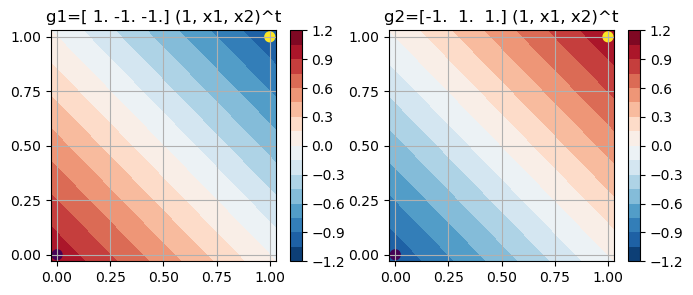

In [1]:
import numpy as np; import matplotlib.pyplot as plt
X = np.array([[0, 0], [1, 1]]).astype(float); y = np.array([1, 2]).astype(int)
x1, x2 = np.meshgrid(np.linspace(-.03, 1.03, 50), np.linspace(-.03, 1.03, 50))
XX = np.c_[np.ravel(x1), np.ravel(x2)]
Wt = np.array([[1, -1, -1], [-1, 1, 1]]).astype(float)
gg = lambda x: (Wt[0, 0] + Wt[0, 1:] @ x, Wt[1, 0] + Wt[1, 1:] @ x)
GG = np.apply_along_axis(gg, 1, XX)
_, axs = plt.subplots(1, 2, figsize=(8, 3))
for i, ax in enumerate(axs.flat):
    ax.set_xticks(np.linspace(0., 1, 5)); ax.set_yticks(np.linspace(0., 1, 5))
    ax.grid(); ax.set_title(f'g{i+1}={Wt[i,:]} (1, x1, x2)^t')
    cp = ax.contourf(x1, x2, GG[:, i].reshape(x1.shape), 15, cmap='RdBu_r')
    plt.colorbar(cp, ax=ax); ax.scatter(*X.T, c=y, s=50);

# 3 Convergence and quality of the solution

**Convergence:** $\;$ Perceptron converges if training samples are **linearly separables**

**Effect of learning rate $\alpha>0$:** $\;$ it converges independently from the selected value, although slowly if $\alpha$ is very small

**Effect of margin $b\geq 0$:** $\;$ it converges with centered boundaries if value is selected close to the maximum margin that allows to linearly classify the training samples with margin; if the margin is too large, Perceptron does not converge 
* It is necessary to carry out experiments with different values for the margin to find that value that generalises optimally